In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [5]:
df.at[336, 'sex'] = 'FEMALE'
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

In [6]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True, dtype=int)
y = df['species']
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model_rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=101)
model_rfc.fit(X_train, y_train)

y_pred = model_rfc.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, y_pred)

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]])

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



---
### Банкноты

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../DATA/data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [13]:
df['Class'].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

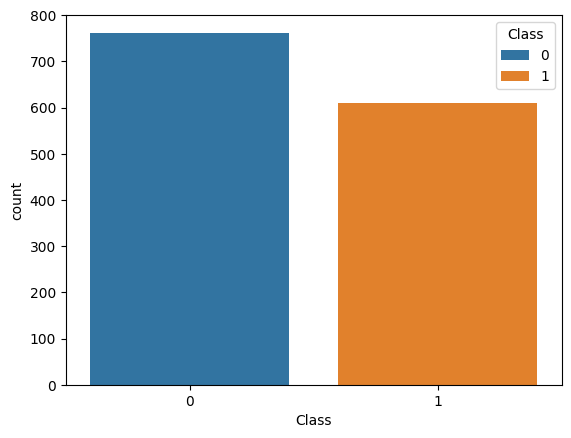

In [14]:
sns.countplot(data=df, x='Class', hue='Class');

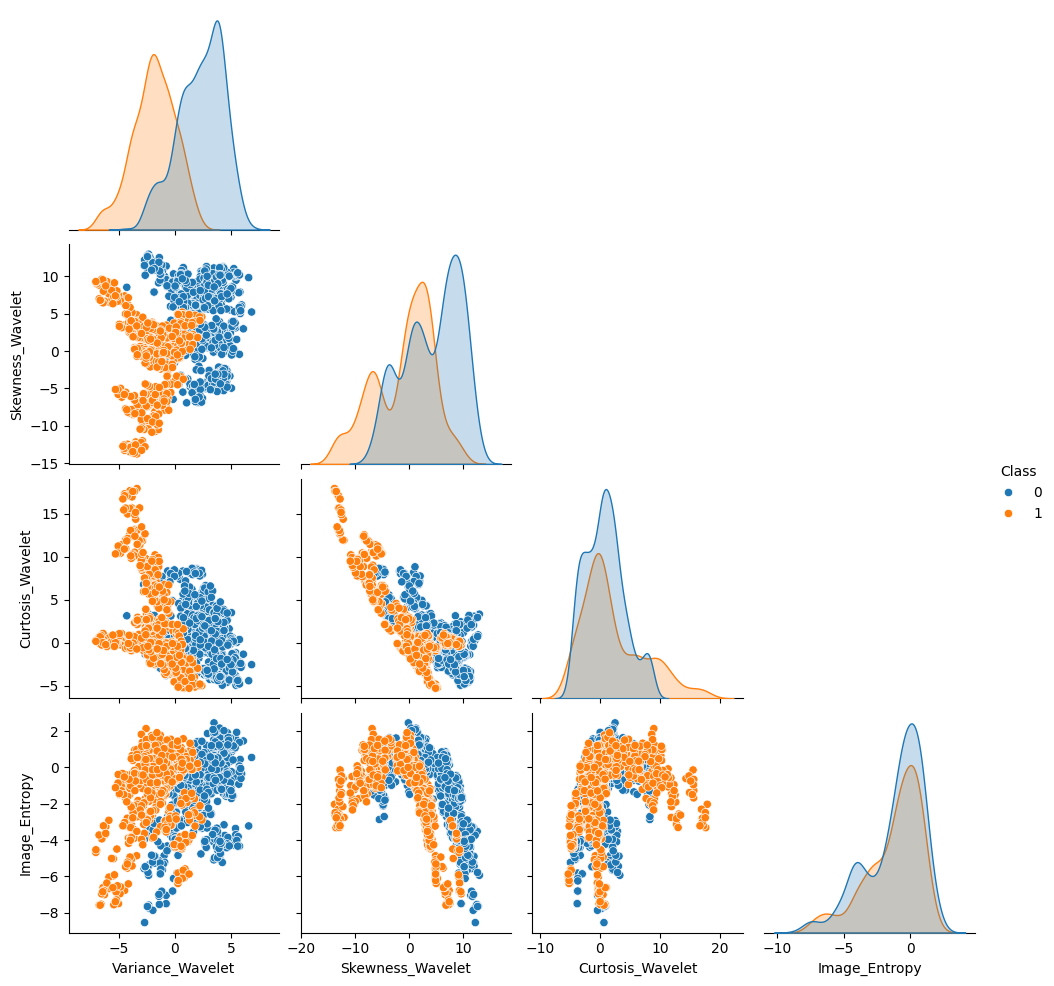

In [15]:
sns.pairplot(data=df, hue='Class', corner=True);

In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

In [44]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

model_rfc = RandomForestClassifier()

param_grid = {'n_estimators': [64, 100, 128, 200],
              'max_features': [2,3,4],
              'bootstrap': [True, False],
              'oob_score': [True, False]}

grid_model = GridSearchCV(estimator=model_rfc, param_grid=param_grid)
grid_model.fit(X_train, y_train)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_forest.py", line 448, in fit
    raise ValueErr

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [45]:
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}

In [46]:
rfc = RandomForestClassifier(max_features=2, n_estimators=128, oob_score=True)
rfc.fit(X_train, y_train)
rfc.oob_score_

0.9939965694682675

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206

[[122   2]
 [  0  82]]


In [57]:
np.sum(y_test != y_pred)

np.int64(2)

In [58]:
from sklearn.metrics import accuracy_score

errors = []
misclass = []

for n in range(1,200):
    
    rfc = RandomForestClassifier(n_estimators=n, max_features=2)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    
    erorr = 1 - accuracy_score(y_test, y_pred)
    n_missed = np.sum(y_pred != y_test)
    
    errors.append(erorr)
    misclass.append(n_missed)

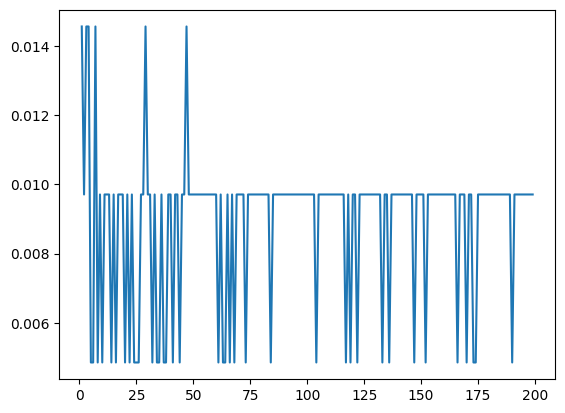

In [63]:
plt.plot(range(1,200), errors);

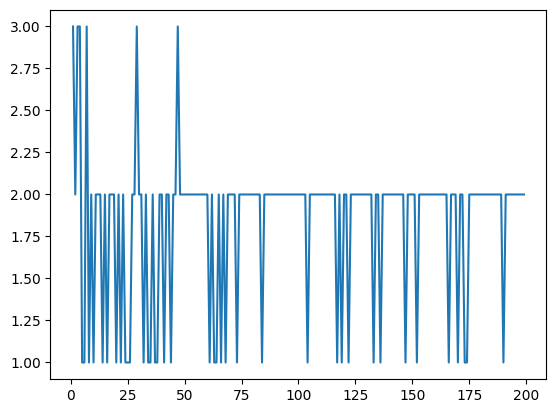

In [64]:
plt.plot(range(1,200), misclass);